# Linear Regression and Decision Tree Regressor

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pandas as pd
import numpy as np

In [2]:
ds = datasets.load_boston()
print(ds.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
df_boston_features = pd.DataFrame(data=ds.data, columns=ds.feature_names)
df_boston_target = pd.DataFrame(data=ds.target, columns=['price'])
print(df_boston_features.head())
print(df_boston_target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


In [13]:
boston_split = train_test_split(df_boston_features, df_boston_target, test_size=0.25, random_state=17) 
df_boston_features_train = boston_split[0]
df_boston_features_test = boston_split[1]
df_boston_target_train = boston_split[2]
df_boston_target_test = boston_split[3]

In [17]:
linear_reg_model = LinearRegression(fit_intercept=True)
linear_reg_model.fit(df_boston_features_train, df_boston_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
dtree_reg_model = DecisionTreeRegressor(max_depth=10)
dtree_reg_model.fit(df_boston_features_train, df_boston_target_train.values.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
linear_reg_predictions = linear_reg_model.predict(df_boston_features_test)
dtree_reg_predictions = dtree_reg_model.predict(df_boston_features_test)

In [33]:
IdealPrices

array([ 7.4       ,  8.26938776,  9.13877551, 10.00816327, 10.87755102,
       11.74693878, 12.61632653, 13.48571429, 14.35510204, 15.2244898 ,
       16.09387755, 16.96326531, 17.83265306, 18.70204082, 19.57142857,
       20.44081633, 21.31020408, 22.17959184, 23.04897959, 23.91836735,
       24.7877551 , 25.65714286, 26.52653061, 27.39591837, 28.26530612,
       29.13469388, 30.00408163, 30.87346939, 31.74285714, 32.6122449 ,
       33.48163265, 34.35102041, 35.22040816, 36.08979592, 36.95918367,
       37.82857143, 38.69795918, 39.56734694, 40.43673469, 41.30612245,
       42.1755102 , 43.04489796, 43.91428571, 44.78367347, 45.65306122,
       46.52244898, 47.39183673, 48.26122449, 49.13061224, 50.        ])

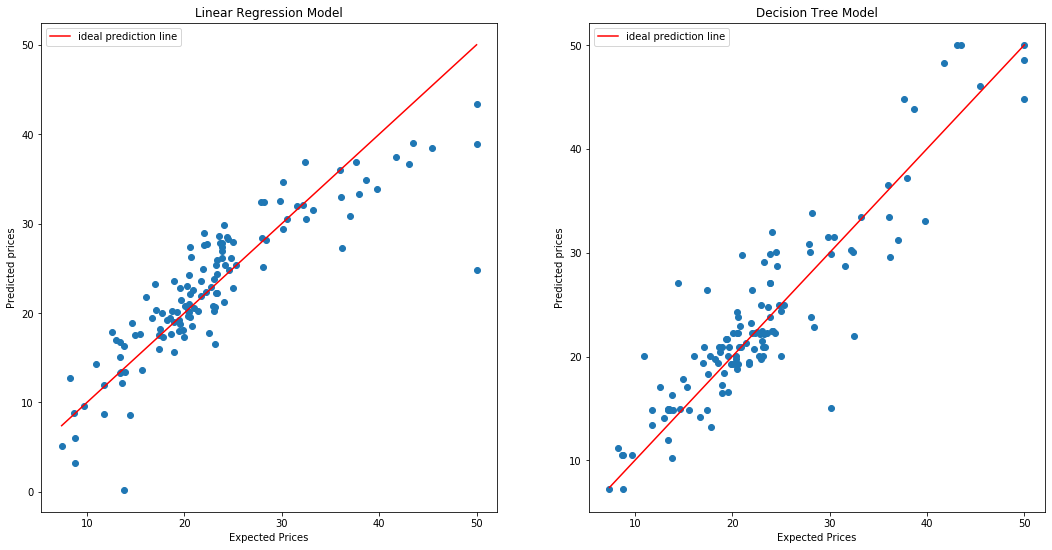

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(18,9))

axes[0].scatter(df_boston_target_test, linear_reg_predictions)
axes[0].set_xlabel("Expected Prices")
axes[0].set_ylabel("Predicted prices")
axes[0].set_title("Linear Regression Model")


axes[1].scatter(df_boston_target_test, dtree_reg_predictions)
axes[1].set_xlabel("Expected Prices")
axes[1].set_ylabel("Predicted prices")
axes[1].set_title("Decision Tree Model")

IdealPrices = np.linspace(df_boston_target_test.values.min(), df_boston_target_test.values.max(), 50)
IdealPredictions = IdealPrices
axes[0].plot(IdealPrices, IdealPredictions, color='#ff0000', label='ideal prediction line')
axes[1].plot(IdealPrices, IdealPredictions, color='#ff0000', label='ideal prediction line')
 
axes[0].legend()
axes[1].legend() 

In [39]:
mse_linear_reg_model = mean_squared_error(df_boston_target_test, linear_reg_predictions)
mse_dtree_reg_model = mean_squared_error(df_boston_target_test, dtree_reg_predictions)
 
rmse_linear_reg_model = sqrt(mse_linear_reg_model)
rmse_dtree_reg_model = sqrt(mse_dtree_reg_model)

In [40]:
print (rmse_linear_reg_model, rmse_dtree_reg_model)

4.256139223131222 3.7762777664114076


In [43]:
r2_linear_reg_model = r2_score(df_boston_target_test, linear_reg_predictions)
r2_dtree_reg_model = r2_score(df_boston_target_test, dtree_reg_predictions)

In [44]:
print (r2_linear_reg_model, r2_dtree_reg_model)

0.7663974484228384 0.8161033602057912
